# Titanic - Machine Learning from Disaster

## Ensemble Random Forests

In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Constants

In [2]:
PATH_PROCESSED_TRAIN_CSV = "data/processed_train.csv"

## Data Collection

In [3]:
train_df = pd.read_csv(PATH_PROCESSED_TRAIN_CSV)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,kinship,FamilyName,Deck,AgeGroup
0,0,3,1,22.0,1,0,523,7.25,2,1,73,8,0
1,1,1,0,38.0,1,0,596,71.28,0,1,136,2,0
2,1,3,0,26.0,0,0,669,7.92,2,0,251,8,0
3,1,1,0,35.0,1,0,49,26.55,2,1,198,2,0
4,0,3,1,35.0,0,0,472,8.05,2,0,11,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.00,2,0,406,8,0
887,1,1,0,19.0,0,0,14,30.00,2,0,221,1,0
888,0,3,0,29.0,1,2,675,11.72,2,3,293,8,0
889,1,1,1,26.0,0,0,8,30.00,0,0,52,2,0


### Feature Selection

_Legend:_

X: Feature Variables (or Independent Variables)

y: Target Variables (or dependent Variables)

In [4]:
X = train_df.drop(["Survived"], axis=1)
y = train_df["Survived"]

### Split dataset into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
X_train.shape, y_train.shape

((668, 12), (668,))

In [7]:
X_test.shape, y_test.shape

((223, 12), (223,))

## Random Forests

In [8]:
from common import functions as func

from sklearn.ensemble import RandomForestClassifier

In [16]:
clf = RandomForestClassifier(
    criterion="entropy",
    max_depth=6,
    min_samples_leaf=3,
    n_estimators=150,
    n_jobs=-1
)


pipeline = make_pipeline(
    StandardScaler(),
    clf
)

_ = pipeline.fit(X_train, y_train)

__Check the most relevant features for the training model__

In [10]:
func.get_feature_importances(clf, X_train)

,Features,Relevance (%)
1,Sex,24
5,Ticket,15
6,Fare,14
9,FamilyName,14
2,Age,12
0,Pclass,6
8,kinship,4
10,Deck,4
3,SibSp,2
4,Parch,2


__Predict and show model result__

In [11]:
y_predict = pipeline.predict(X_test)
func.show_model_result(pipeline, X, y, y_test, y_predict)


Computing cross-validated metrics
----------------------------------------------------------------------
Scores: [0.81005587 0.79775281 0.82022472 0.83146067 0.85955056]
Mean = 0.82 / Standard Deviation = 0.02

Confunsion Matrix
----------------------------------------------------------------------
[[116  18]
 [ 22  67]]

Classification Report
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       134
           1       0.79      0.75      0.77        89

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223

----------------------------------------------------------------------
Accuracy: 0.82
Precicion: 0.79
Sensitivity aka Recall: 0.75
F1-Score: 0.77


**Show Curve ROC and Area Under the ROC**

----------------------------------------------------------------------
AUC-Area Under the ROC Curve: 0.81
----------------------------------------------------------------------


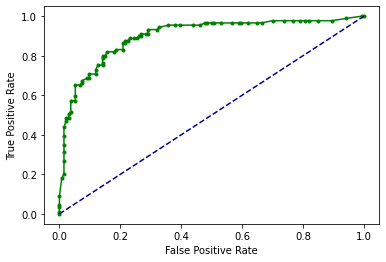

In [12]:
func.show_curve_roc(pipeline, X_test, y_test, y_predict)

__Compare Ground Truth vs Prediction Model__

In [13]:
func.get_error_prediction(X_test, y_test, y_predict)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,kinship,FamilyName,Deck,AgeGroup,Ground Truth,Prediction
300,3,0,29.0,0,0,513,7.75,1,0,306,8,0,1,0
137,1,1,37.0,1,0,49,26.55,2,1,198,2,0,0,1
621,1,1,42.0,1,0,56,52.55,2,1,311,3,0,1,0
447,1,1,34.0,0,0,45,26.55,2,0,544,8,0,1,0
192,3,0,19.0,1,0,406,7.85,2,1,14,8,0,1,0
673,2,1,31.0,0,0,145,13.00,2,0,645,8,0,1,0
396,3,0,31.0,0,0,414,7.85,2,0,454,8,0,0,1
235,3,0,29.0,0,0,677,7.55,2,0,237,8,0,0,1
204,3,1,18.0,0,0,530,8.05,2,0,117,8,0,1,0
23,1,1,28.0,0,0,42,35.50,2,0,568,0,0,1,0
